In [25]:
import pandas as pd
import os
import datetime
from datetime import datetime
from datetime import timedelta
import pygal
# import cairocffi as cairo
# import cairosvg
import matplotlib
from dateutil.parser import parse
import matplotlib.pyplot as plt


import numpy as np

from scipy.stats import ks_2samp
from scipy.stats import chisquare
%matplotlib inline

In [2]:
archivo = datetime.now().strftime('%y%m%d')+'COVID19MEXICO'
archivo = '200502COVID19MEXICO.csv'
print(archivo)
# df = pd.read_csv(archivo)
Demograficos = pd.read_excel('200502COVID19MEXICO.xlsx')
Demograficos.head(5)

200502COVID19MEXICO.csv


,ID_REGISTRO,ORIGEN,SECTOR,ENTIDAD_UM,SEXO,ENTIDAD_NAC,ENTIDAD_RES,MUNICIPIO_RES,TIPO_PACIENTE,FECHA_INGRESO,...,CARDIOVASCULAR,OBESIDAD,RENAL_CRONICA,TABAQUISMO,OTRO_CASO,RESULTADO,MIGRANTE,PAIS_NACIONALIDAD,PAIS_ORIGEN,UCI
0,0ceb0f,1,4,1,1,1,1,1,1,2020-01-14,...,2,2,2,2,99,1,99,MÃ©xico,99,97
1,1d9580,1,12,2,2,15,2,2,1,2020-04-19,...,2,2,2,2,1,1,99,MÃ©xico,99,97
2,119b76,1,4,21,2,21,21,114,1,2020-03-23,...,2,2,2,2,99,1,99,MÃ©xico,99,97
3,0e6c05,1,4,2,2,2,2,2,2,2020-03-24,...,2,1,2,2,99,1,99,MÃ©xico,99,2
4,140d7f,1,12,29,1,29,29,21,1,2020-03-28,...,2,2,2,2,2,2,99,MÃ©xico,99,97


# Casos Positivos

In [3]:
df = Demograficos[(Demograficos['RESULTADO'] == 1)]
print(df.shape,df.columns)
df.head(5)


(22088, 34) Index(['ID_REGISTRO', 'ORIGEN', 'SECTOR', 'ENTIDAD_UM', 'SEXO', 'ENTIDAD_NAC',
       'ENTIDAD_RES', 'MUNICIPIO_RES', 'TIPO_PACIENTE', 'FECHA_INGRESO',
       'FECHA_SINTOMAS', 'FECHA_DEF', 'INTUBADO', 'NEUMONIA', 'EDAD',
       'NACIONALIDAD', 'EMBARAZO', 'HABLA_LENGUA_INDIG', 'DIABETES', 'EPOC',
       'ASMA', 'INMUSUPR', 'HIPERTENSION', 'OTRA_COM', 'CARDIOVASCULAR',
       'OBESIDAD', 'RENAL_CRONICA', 'TABAQUISMO', 'OTRO_CASO', 'RESULTADO',
       'MIGRANTE', 'PAIS_NACIONALIDAD', 'PAIS_ORIGEN', 'UCI'],
      dtype='object')


,ID_REGISTRO,ORIGEN,SECTOR,ENTIDAD_UM,SEXO,ENTIDAD_NAC,ENTIDAD_RES,MUNICIPIO_RES,TIPO_PACIENTE,FECHA_INGRESO,...,CARDIOVASCULAR,OBESIDAD,RENAL_CRONICA,TABAQUISMO,OTRO_CASO,RESULTADO,MIGRANTE,PAIS_NACIONALIDAD,PAIS_ORIGEN,UCI
0,0ceb0f,1,4,1,1,1,1,1,1,2020-01-14,...,2,2,2,2,99,1,99,MÃ©xico,99,97
1,1d9580,1,12,2,2,15,2,2,1,2020-04-19,...,2,2,2,2,1,1,99,MÃ©xico,99,97
2,119b76,1,4,21,2,21,21,114,1,2020-03-23,...,2,2,2,2,99,1,99,MÃ©xico,99,97
3,0e6c05,1,4,2,2,2,2,2,2,2020-03-24,...,2,1,2,2,99,1,99,MÃ©xico,99,2
5,09b118,1,4,2,1,2,2,4,1,2020-03-29,...,2,2,2,2,99,1,99,MÃ©xico,99,97


In [4]:
def Proc_freq_sin_aumulados(data,var):
    tabla_aux = pd.DataFrame(data)
    table_freq = pd.value_counts(tabla_aux[var]).to_frame().reset_index()
    table_freq.columns = [var,'Frequency']
    table_porc = pd.value_counts(tabla_aux[var],normalize = True).to_frame().reset_index()
    table_porc.columns = [var,'aux']
    table_porc['Percent'] = table_porc['aux'] *100
    table_porc['Percent'].round(3) 
    table_porc = table_porc.drop(columns = 'aux')
    table_salida = pd.merge(table_freq, table_porc, on=var)
    return table_salida

In [5]:
df = df.rename(columns={'FECHA_DEF':'Aux_FECHA_DEF'})
df['flag_defuncion'] = df['Aux_FECHA_DEF'].apply(lambda x: 0 if x == '9999-99-99' else 1)

Proc_freq_sin_aumulados(df,'flag_defuncion')

,flag_defuncion,Frequency,Percent
0,0,20027,90.669142
1,1,2061,9.330858


In [6]:
df.loc[df['flag_defuncion'] == 1,'FECHA_DEF'] = df['Aux_FECHA_DEF']
print(df['FECHA_DEF'].dtypes)

object


In [7]:
aux = Proc_freq_sin_aumulados(df,'FECHA_DEF')
aux.sort_values(['FECHA_DEF'],ascending=False,inplace=True)
aux

,FECHA_DEF,Frequency,Percent
37,2020-05-02,3,0.145560
31,2020-05-01,18,0.873362
24,2020-04-30,37,1.795245
14,2020-04-29,63,3.056769
17,2020-04-28,61,2.959728
8,2020-04-27,84,4.075691
2,2020-04-26,110,5.337215
0,2020-04-25,113,5.482775
1,2020-04-24,110,5.337215
4,2020-04-23,95,4.609413


In [8]:
df = df.rename(columns={'SEXO':'AUX_SEXO'}) 
df.loc[df['AUX_SEXO'] == 1,'Sexo'] = 'Mujer'
df.loc[df['AUX_SEXO'] == 2,'Sexo'] = 'Hombre'
df = df.drop(columns={'AUX_SEXO'}) 
Proc_freq_sin_aumulados(df,'Sexo')

,Sexo,Frequency,Percent
0,Hombre,12840,58.131112
1,Mujer,9248,41.868888


In [9]:
df = df.rename(columns={'TIPO_PACIENTE':'AUX_TIPO_PACIENTE'}) 
df.loc[df['AUX_TIPO_PACIENTE'] == 1,'TIPO_PACIENTE'] = 'Ambulatorio'
df.loc[df['AUX_TIPO_PACIENTE'] == 2,'TIPO_PACIENTE'] = 'Hospitalizado'
df.loc[df['AUX_TIPO_PACIENTE'] == 99,'TIPO_PACIENTE'] = 'No Especificado'
df = df.drop(columns={'AUX_TIPO_PACIENTE'}) 
Proc_freq_sin_aumulados(df,'TIPO_PACIENTE')

,TIPO_PACIENTE,Frequency,Percent
0,Ambulatorio,13376,60.557769
1,Hospitalizado,8712,39.442231


In [10]:
def variables_si_no(data):
    if data[variable_aux] == 1:
        val = 'Si'
    elif data[variable_aux] == 2:
        val = 'No'
    elif data[variable_aux] == 97:
        val = 'No Aplica'
    elif data[variable_aux] == 98:
        val = 'No se sabe'
    elif data[variable_aux] == 99:
        val = 'No especificado'
    
    return val

In [11]:
Var_si_No = ['INTUBADO','NEUMONIA','EMBARAZO','DIABETES','EPOC','ASMA','INMUSUPR',
             'HIPERTENSION','OTRA_COM','CARDIOVASCULAR','OBESIDAD','RENAL_CRONICA','TABAQUISMO','OTRO_CASO']

In [12]:
for var_i in Var_si_No:
    variable_aux = 'Aux_'+var_i
    print (var_i,'<------->',variable_aux)
    df = df.rename(columns={var_i:variable_aux}) 
    df[var_i] = df.apply(variables_si_no, axis=1)
    df = df.drop(columns={variable_aux}) 
    print(Proc_freq_sin_aumulados(df,var_i))
    print('\n')

INTUBADO <-------> Aux_INTUBADO
          INTUBADO  Frequency    Percent
0        No Aplica      13376  60.557769
1               No       7788  35.258964
2               Si        920   4.165158
3  No especificado          4   0.018109


NEUMONIA <-------> Aux_NEUMONIA
          NEUMONIA  Frequency    Percent
0               No      15601  70.631112
1               Si       6486  29.364361
2  No especificado          1   0.004527


EMBARAZO <-------> Aux_EMBARAZO
     EMBARAZO  Frequency    Percent
0   No Aplica      12840  58.131112
1          No       9033  40.895509
2          Si        127   0.574973
3  No se sabe         88   0.398406


DIABETES <-------> Aux_DIABETES
     DIABETES  Frequency    Percent
0          No      17757  80.392068
1          Si       4105  18.584752
2  No se sabe        226   1.023180


EPOC <-------> Aux_EPOC
         EPOC  Frequency    Percent
0          No      21310  96.477725
1          Si        553   2.503622
2  No se sabe        225   1.018653


A

# Fallecidos

In [13]:
df_fallecidos =df[df['flag_defuncion'] == 1]
print(df_fallecidos.shape)
df_fallecidos.head(10)


(2061, 36)


,ID_REGISTRO,ORIGEN,SECTOR,ENTIDAD_UM,ENTIDAD_NAC,ENTIDAD_RES,MUNICIPIO_RES,FECHA_INGRESO,FECHA_SINTOMAS,Aux_FECHA_DEF,...,EPOC,ASMA,INMUSUPR,HIPERTENSION,OTRA_COM,CARDIOVASCULAR,OBESIDAD,RENAL_CRONICA,TABAQUISMO,OTRO_CASO
59,108695,1,4,9,9,9,15,2020-03-23,2020-03-23,2020-04-11 00:00:00,...,Si,Si,No,Si,No,Si,Si,No,No,No especificado
150,110f91,1,4,9,9,9,7,2020-03-22,2020-03-22,2020-04-04 00:00:00,...,No,No,No,No,No,No,No,No,No,No especificado
151,072ac8,1,4,9,9,9,6,2020-03-25,2020-03-20,2020-04-06 00:00:00,...,No,No,No,No,No,No,No,No,No,No especificado
169,02f508,1,4,9,9,9,10,2020-03-30,2020-03-30,2020-04-13 00:00:00,...,No,No,No,No,No,No,No,No,Si,No especificado
175,1ab843,1,4,24,24,24,28,2020-03-23,2020-03-20,2020-03-24 00:00:00,...,No,No,No,Si,No,No,No,No,Si,No especificado
192,183087,1,4,9,12,9,5,2020-03-20,2020-03-20,2020-04-11 00:00:00,...,No,No,No,No,No,No,No,No,No,No especificado
207,63132,1,4,9,9,9,15,2020-03-30,2020-03-24,2020-04-01 00:00:00,...,No,No,No,No,No,No,No,No,No,No especificado
222,1a2704,1,4,9,15,9,5,2020-03-23,2020-03-23,2020-04-10 00:00:00,...,No,No,No,No,No,No,No,No,No,No especificado
232,1b64a5,1,4,8,9,8,37,2020-03-30,2020-03-25,2020-04-08 00:00:00,...,No,Si,No,No,No,No,No,No,No,No especificado
233,1a33a7,1,4,2,26,2,2,2020-03-24,2020-03-20,2020-04-04 00:00:00,...,No,No,No,Si,No,No,No,No,No,No especificado


    INTUBADO  Frequency
0         No       1373
1         Si        485
2  No Aplica        203


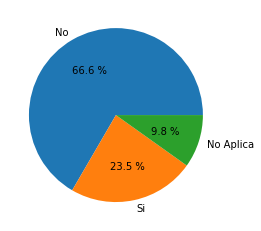



  NEUMONIA  Frequency
0       Si       1541
1       No        520


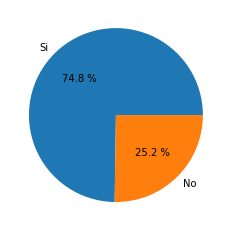



     EMBARAZO  Frequency
0          No        638
1          Si          5
2  No se sabe          4


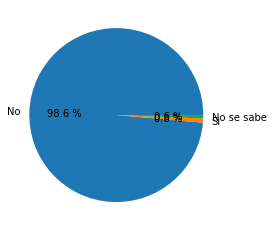



     DIABETES  Frequency
0          No       1231
1          Si        819
2  No se sabe         11


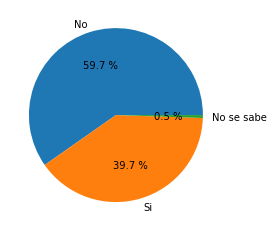



         EPOC  Frequency
0          No       1908
1          Si        143
2  No se sabe         10


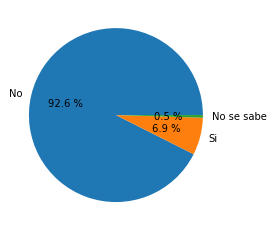



         ASMA  Frequency
0          No       1983
1          Si         66
2  No se sabe         12


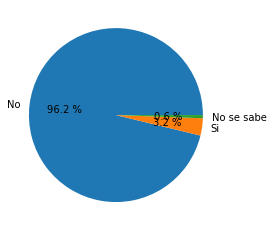



     INMUSUPR  Frequency
0          No       1964
1          Si         85
2  No se sabe         12


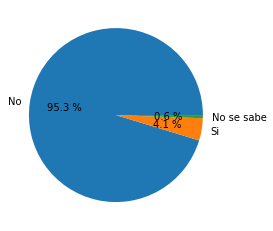



  HIPERTENSION  Frequency
0           No       1164
1           Si        886
2   No se sabe         11


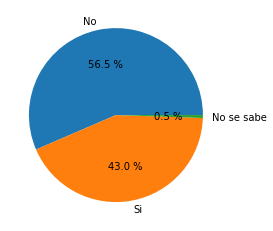



     OTRA_COM  Frequency
0          No       1928
1          Si        116
2  No se sabe         17


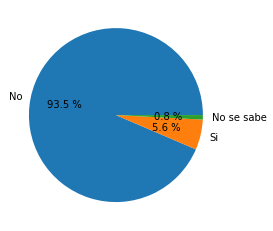



  CARDIOVASCULAR  Frequency
0             No       1907
1             Si        139
2     No se sabe         15


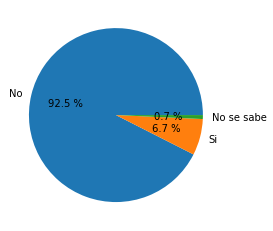



     OBESIDAD  Frequency
0          No       1424
1          Si        628
2  No se sabe          9


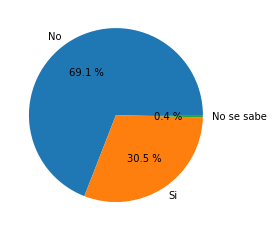



  RENAL_CRONICA  Frequency
0            No       1900
1            Si        148
2    No se sabe         13


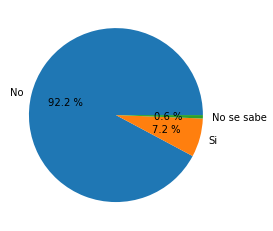



   TABAQUISMO  Frequency
0          No       1861
1          Si        186
2  No se sabe         14


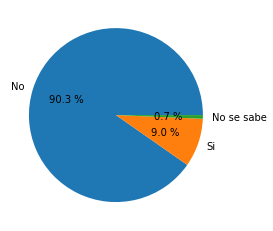



         OTRO_CASO  Frequency
0  No especificado       1031
1               No        781
2               Si        249


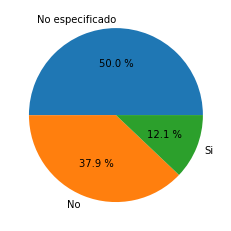

<Figure size 432x288 with 0 Axes>

In [31]:
for var_i in Var_si_No:
    variable_aux = 'Aux_'+ var_i
#     print (var_i,'<------->',variable_aux)
#     print(Proc_freq_sin_aumulados(df_fallecidos,var_i))
    if var_i == 'EMBARAZO':
        tabla_freq = Proc_freq_sin_aumulados(df_fallecidos[df_fallecidos['Sexo'] == 'Mujer'],var_i)
    else:
        tabla_freq = Proc_freq_sin_aumulados(df_fallecidos,var_i)
    tabla_freq = tabla_freq.drop(columns={'Percent'})
    print(tabla_freq)
    
    nombres = tabla_freq[var_i].values.tolist()
    valores = tabla_freq['Frequency'].values.tolist()
    
    plt.pie(valores, labels=nombres, autopct="%0.1f %%")
    plt.show()
    
    plt.savefig("Probabilidad_de_muerte_por_" + var_i )
    
#     nombre_grafica =  "Probabilidad_de_muerte_por_" + var_i
#     plt.render_to_png(nombre_grafica)
#     plt.render_to_file(nombre_grafica +'.png')
    
    
#     line_chart = pygal.StackedBar()
#     line_chart.title = var_i
#     line_chart.x_labels = ["# Casos"]    
    
#     tabla_freq_list = tabla_freq.values.tolist()
# #     print(tabla_freq_list)
#     for elemento_i in tabla_freq_list:
# #         print(elemento_i)
# #         print(elemento_i[0],'------>',elemento_i[1])
#         line_chart.add(elemento_i[0], [elemento_i[1]])
    
    
#     nombre_grafica =  "Probabilidad_de_muerte_por_" + var_i
#     line_chart.render_to_png(nombre_grafica)
# #     line_chart.render_to_file(nombre_grafica +'.png')
    

# #     print(line_chart)
    
    
    print('\n')